In [1]:
import turtle

In [3]:
t = turtle.Turtle()
t

In [4]:
def roof():
    """Draw a triangle to represent a roof"""
    for i in range(3):
        t.lt(120)
        t.forward(100)

In [5]:
def house():
    """Draw a rectangle to represent a house"""
    for i in range(4):
        t.rt(90)
        t.forward(100)

In [6]:
roof()
house()

In [7]:
turtle.mainloop()

In [11]:
my_variable = 'cat'

isinstance(my_variable, int)

False

In [16]:
def avg(num1,num2):
  if isinstance(num2,int) == False:
    print('Please use two numbers as parameters')
  else:
    return print((num1+num2)/2)

In [17]:
avg(10,'cat')

Please use two numbers as parameters


In [18]:
def even_odd(test, arr):
    odd = []
    even = []
    for num in arr :
        if num%2 ==0:
            even.append(num)
        else :
            odd.append(num)
    if test == True:
        return print(even)
    else:
        return print(odd)
        

In [19]:
even_odd(True,[13, 22, 8, 31])

[22, 8]


In [20]:
even_odd(False,[13, 22, 8, 31])

[13, 31]


In [2]:
import torch
import torch.nn as nn
from torch import sigmoid 

In [3]:
class Neural(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Neural,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
    def forward(self,x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

In [120]:
from torch.utils.data import Dataset
import random
import numpy as np
class Cubic(Dataset): # class Dataset() to generate our data/dataset that will be fed into our model
    def __init__(self,train,length): # initializer to generate train/validate data, with number of samples as length
        # generating weights randomly which are coefficients in the polynomial y = w1.x^2 + w2.x + c
        w1 = random.random()
        w2 = random.random()
        w3 = random.random()
        
        self.x = np.random.uniform(low = -5, high = 5, size=length) # independent variable
        if train == True:
            self.x = self.x[0:200] #samples in training data
            self.b0 = np.random.normal(-10,10,int(length*.80)).reshape(-1,1) # adding gaussian noise 
        elif train == False:
            self.x = self.x[200::] # samples in validation data
            self.b0 = np.random.normal(-10,10,int(length*.20)).reshape(-1,1)
        # regression model in pytorch assumes y = f(x) as y = mx + c, hence we convert our quadratic polynomial to this form
        self.p = self.x**3
        self.z = self.x**2 # y = w1.z + w2.x + c 
        self.X = np.vstack((self.p,self.z,self.x)).T # X = [z,x] with dimensions lengthx2, length rows & 2 columns
        self.W = np.asarray([w1,w2,w3]).reshape((3,1)) # W will have dimensions 2x1, 2 rows and 1 column to obtain a dot product with X
        self.y = np.dot(self.X,self.W) + self.b0 # y = X.W + B, where y has dimensions lengthx1
        
        self.len = length
       
    def __getitem__(self,index): # to fetech our X samples and its corresponding y samples 
        points = torch.tensor(self.X, dtype = torch.float32), torch.tensor(self.y, dtype = torch.float32)
        return points # this will be a tuple
    
    def __len__(self):
        return self.len

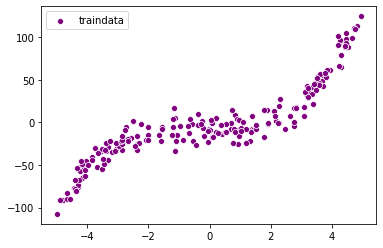

In [125]:
samples_train = Cubic(True,250) # train is True and length is the number of samples I want 
samples_val = Cubic(False,250) # train is false to obtain validation samples
len(samples_train.x), len(samples_val.x)
import seaborn as sns
sns.scatterplot(samples_train.x.flatten(),samples_train.y.flatten(), color = 'purple', label = 'traindata')

In [13]:
MODELS = []
for i in range(1,10):
    model = Neural(3,i,1).to('cuda')
    MODELS.append(model)
MODELS[0]

Neural(
  (linear1): Linear(in_features=3, out_features=1, bias=True)
  (linear2): Linear(in_features=1, out_features=1, bias=True)
)

In [126]:
from torch import optim
# initiate model before you initiate the model parameters;
model = Neural(3,4,1).to('cuda')

criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr =0.001)

In [127]:
#model = Neural(3,4,1).to('cuda')
epochs = 5
cost =[]
total = 0
for epoch in range(epochs):
    total = 0
    for y,x in zip(samples_train.y,samples_train.X):
        yhat = model(torch.tensor(x,dtype = torch.float32).to('cuda'))
        loss = criterion(yhat,torch.tensor(y, dtype = torch.float32).to('cuda'))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total+= loss.item()
    cost.append(total)
    
    print(np.mean(cost))

2406.7841253876686
2249.2662792503834
2194.6939739783606
2159.8791851252317
2140.4727866768835


In [16]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0195,  0.1766, -0.4909],
                      [-0.4934,  0.2460, -0.4733],
                      [ 0.1842, -0.5558,  0.1414],
                      [ 0.3786,  0.0889, -0.2496]], device='cuda:0')),
             ('linear1.bias',
              tensor([-0.3550,  0.1092,  0.5686,  0.0390], device='cuda:0')),
             ('linear2.weight',
              tensor([[ 0.1949, -0.4010, -0.1418,  0.3340]], device='cuda:0')),
             ('linear2.bias', tensor([-0.0498], device='cuda:0'))])

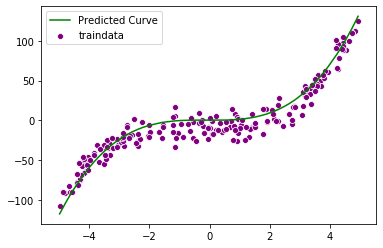

In [128]:
predict = model(torch.tensor(samples_train.X, dtype = torch.float32).to('cuda'))
predict = predict.detach().to('cpu').numpy()
curve = sns.lineplot(samples_train.x.flatten(),predict.flatten(),label = 'Predicted Curve', color = 'green')
sns.scatterplot(samples_train.x.flatten(),samples_train.y.flatten(), color = 'purple', label = 'traindata')

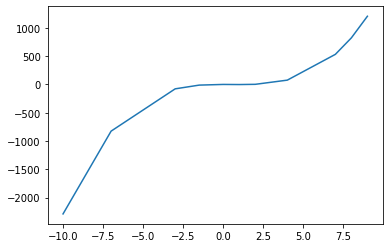

In [49]:
a = np.asarray([-10,-7,-3,-1.5,0,0.5,1,2,4,7,8,9])
b = a**3
c = a**2

A = np.vstack((b,c,a)).T
w1 = 2
w2 = -3
w3 = -1
b0 = 1
W = np.asarray([w1,w2,w3]).reshape((3,1))
W

y = np.dot(A,W) + b0
y
sns.lineplot(a.flatten(),y.flatten())

In [129]:
import matplotlib.pyplot as plt

In [130]:
def train_model(model,learning_rate, epochs, dataset):
    cost = []
    total = 0
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)
    for epoch in range(epochs):
        total = 0 
        for x,y in dataset:
            #optimizer.zero_grad()
            yhat = model(x.to('cuda'))
            loss = criterion(yhat,y.to('cuda'))
            optimizer.zero_grad()
            loss.backward()
            #print(loss)
            optimizer.step()
            total+= loss.item()
        cost.append(total)       
    return model, cost

In [131]:
def evaluate_model(model,x_data,y_data):
    criterion = nn.L1Loss()
    y_predicted = model(torch.tensor(x_data, dtype=torch.float32).to('cuda'))
    loss_predicted = criterion(y_predicted, torch.tensor(y_data, dtype = torch.float32).to('cuda'))
    error= loss_predicted.item()
    return error

In [132]:
model = Neural(3,5,1).to('cuda')
predictions = train_model(model,0.001,2,train_loader)
predictions[1]

[108.56288146972656, 107.39045524597168]

In [133]:
from torch.utils.data import DataLoader
train_loader = DataLoader(samples_train,64,True) #this will present the data to our model in batches of 50 sample
list(train_loader)

[[tensor([[[-3.8723e+01,  1.1446e+01, -3.3832e+00],
           [ 7.6387e+01,  1.8003e+01,  4.2430e+00],
           [-1.6619e-05,  6.5122e-04, -2.5519e-02],
           ...,
           [-1.7472e+00,  1.4506e+00, -1.2044e+00],
           [-2.3468e+01,  8.1970e+00, -2.8630e+00],
           [-8.5703e+01,  1.9439e+01, -4.4089e+00]],
  
          [[-3.8723e+01,  1.1446e+01, -3.3832e+00],
           [ 7.6387e+01,  1.8003e+01,  4.2430e+00],
           [-1.6619e-05,  6.5122e-04, -2.5519e-02],
           ...,
           [-1.7472e+00,  1.4506e+00, -1.2044e+00],
           [-2.3468e+01,  8.1970e+00, -2.8630e+00],
           [-8.5703e+01,  1.9439e+01, -4.4089e+00]],
  
          [[-3.8723e+01,  1.1446e+01, -3.3832e+00],
           [ 7.6387e+01,  1.8003e+01,  4.2430e+00],
           [-1.6619e-05,  6.5122e-04, -2.5519e-02],
           ...,
           [-1.7472e+00,  1.4506e+00, -1.2044e+00],
           [-2.3468e+01,  8.1970e+00, -2.8630e+00],
           [-8.5703e+01,  1.9439e+01, -4.4089e+00]],
  
    

In [153]:
MODELS = []
for i in range(1,10):
    model = Neural(3,i,1).to('cuda')
    MODELS.append(model)

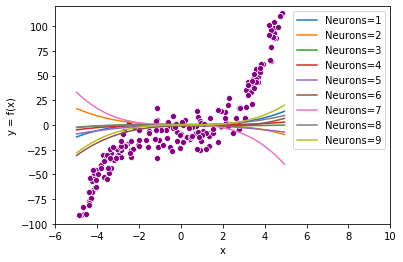

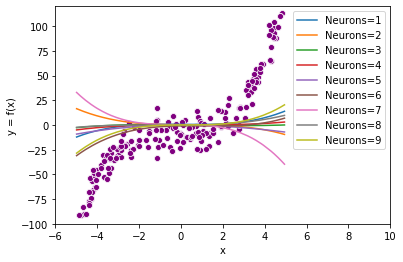

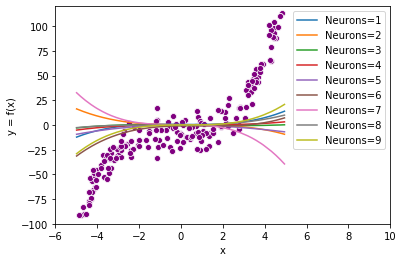

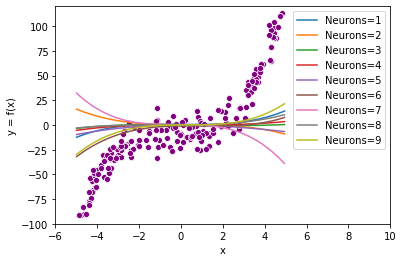

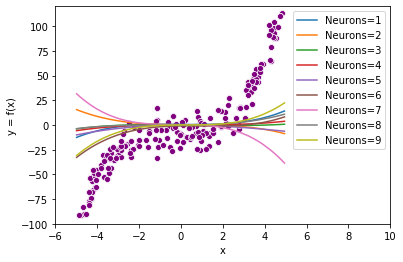

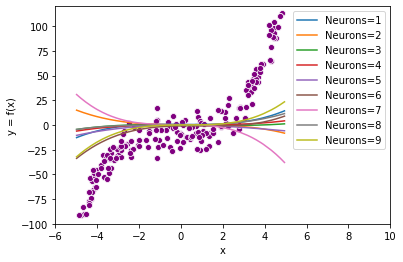

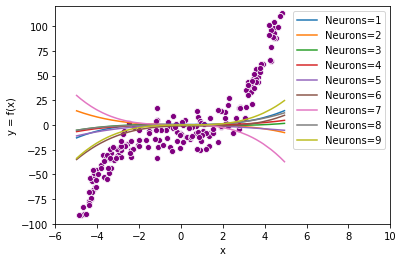

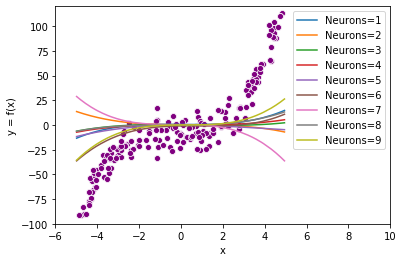

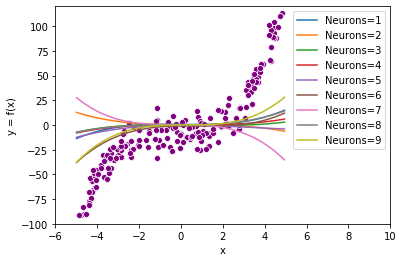

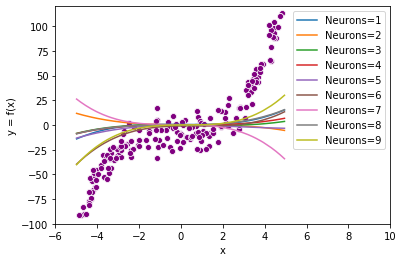

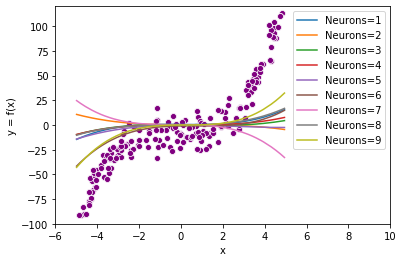

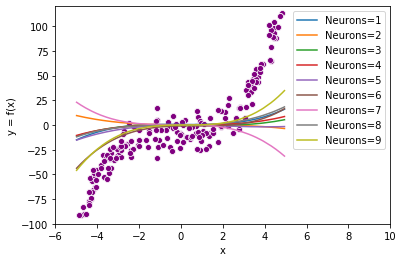

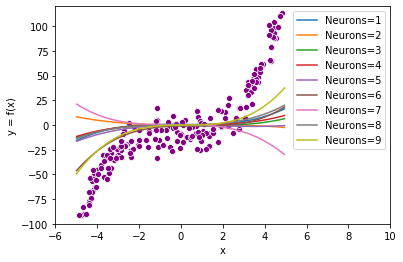

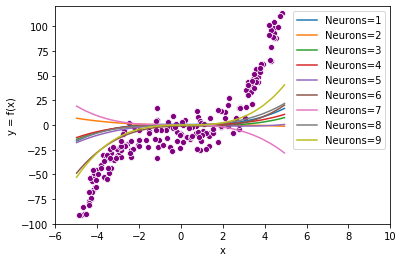

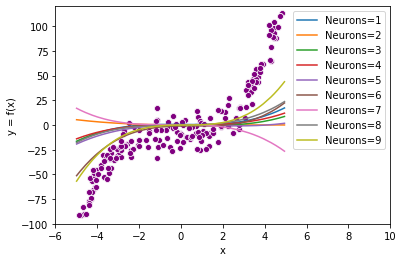

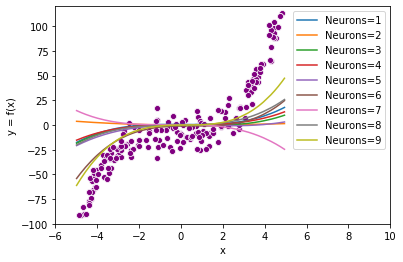

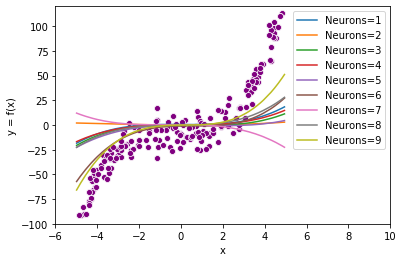

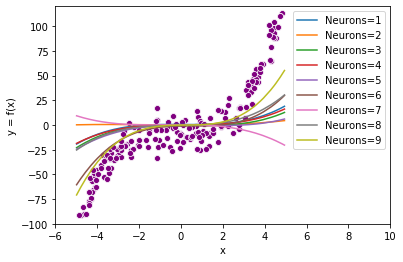

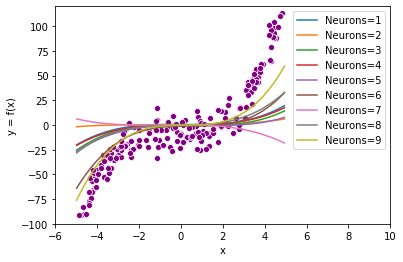

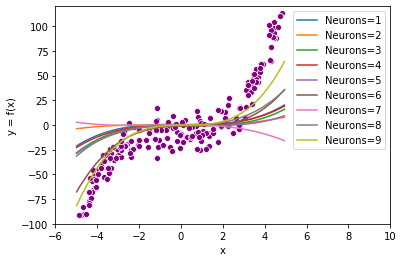

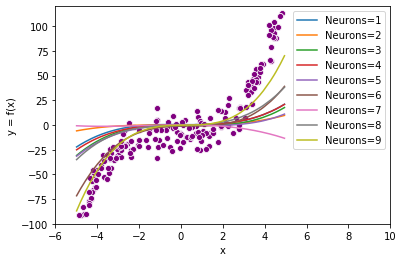

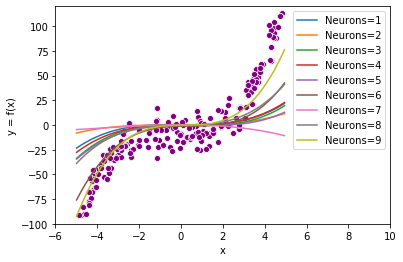

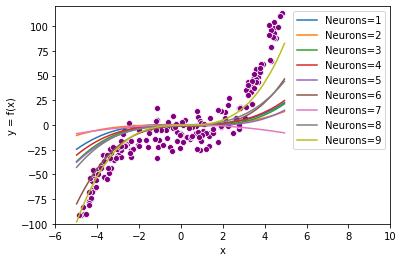

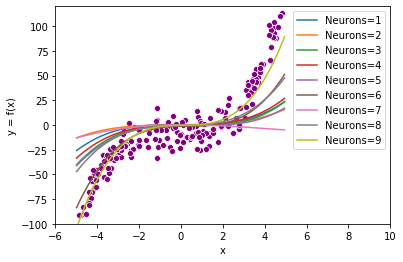

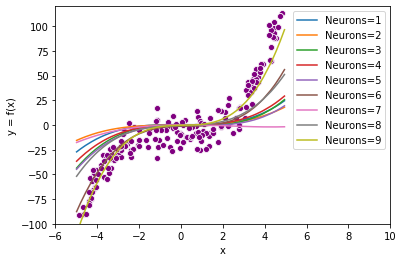

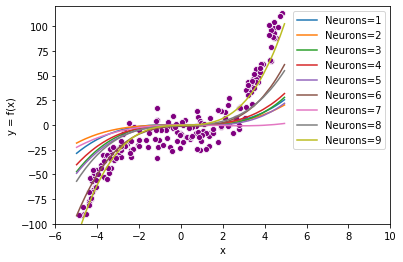

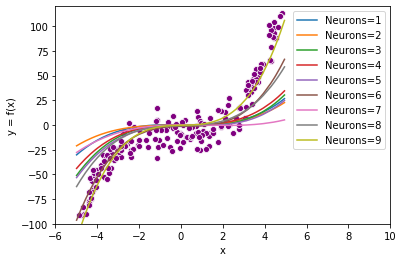

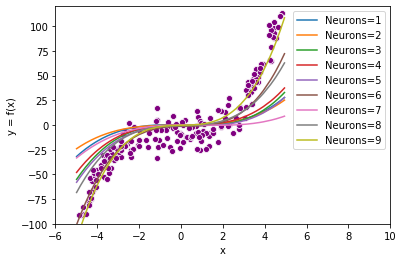

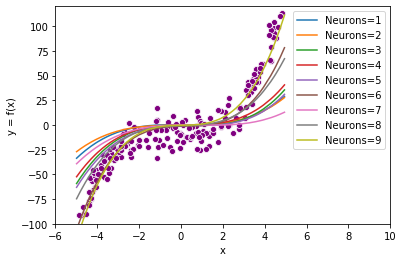

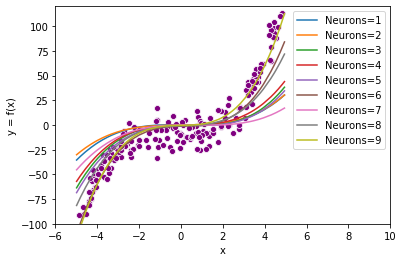

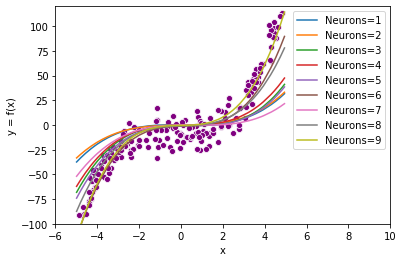

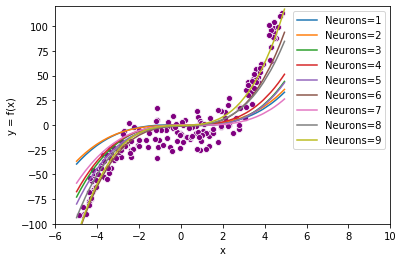

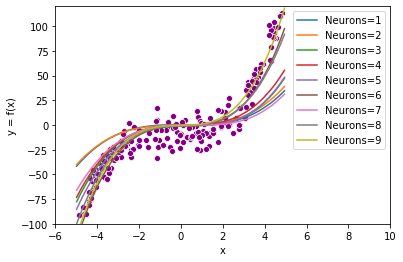

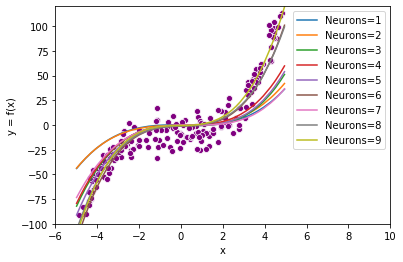

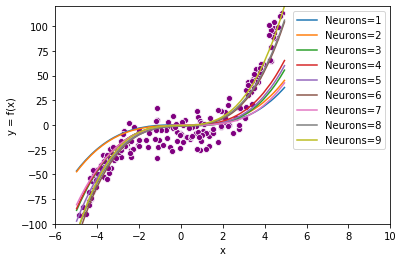

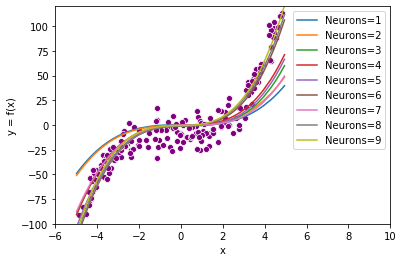

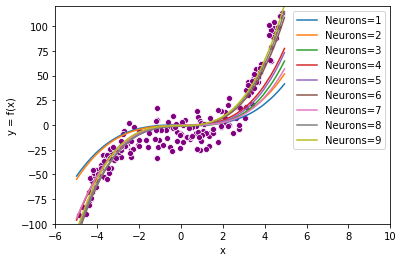

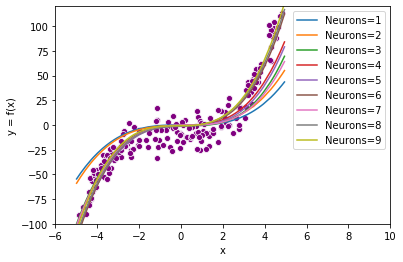

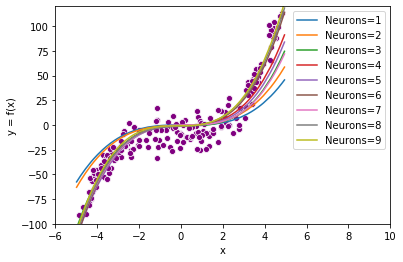

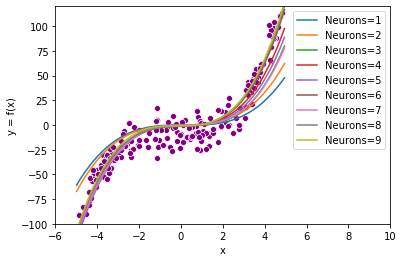

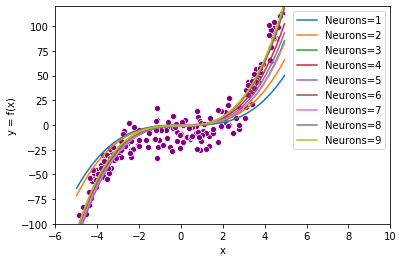

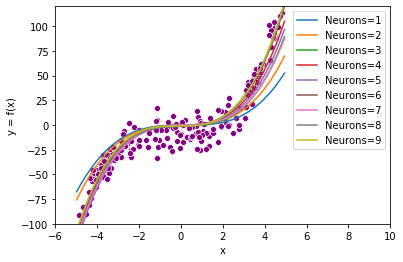

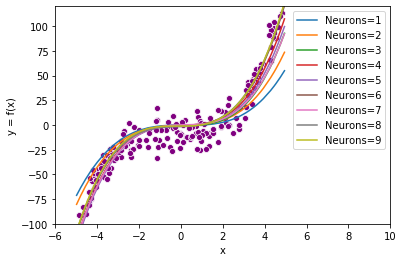

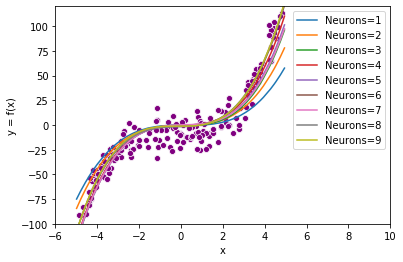

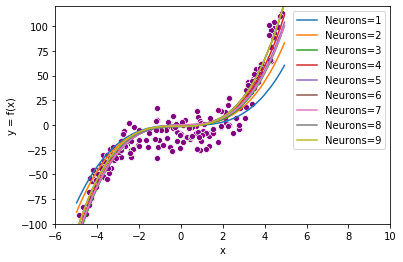

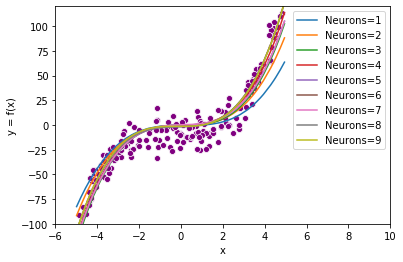

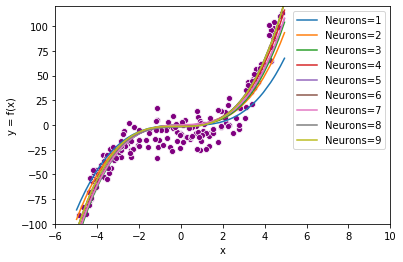

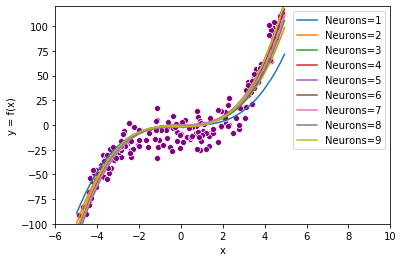

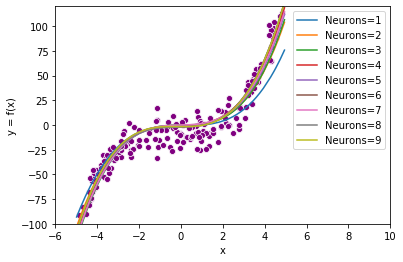

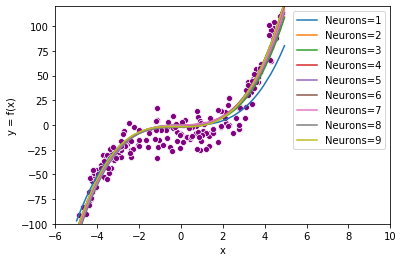

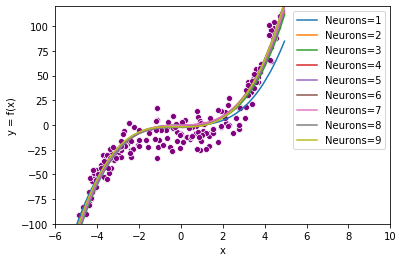

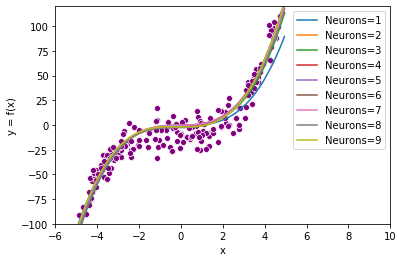

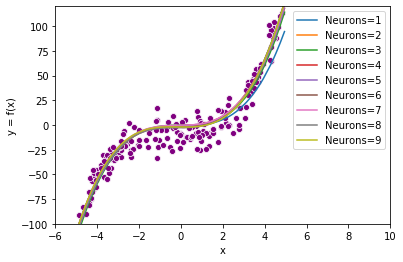

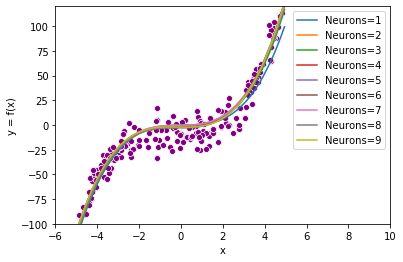

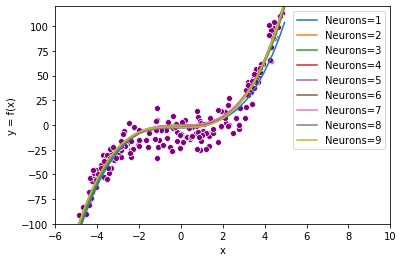

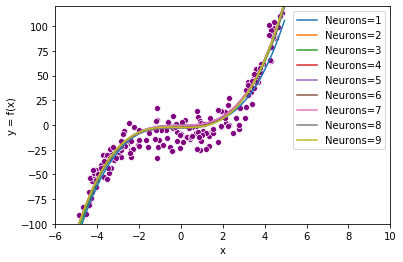

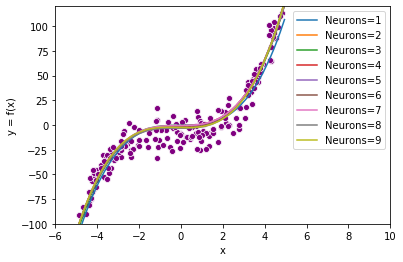

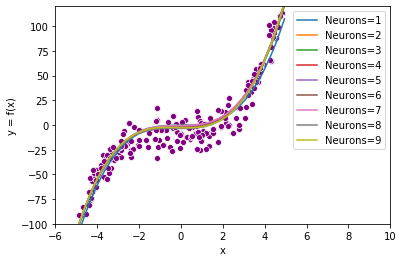

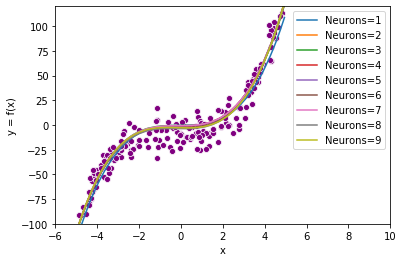

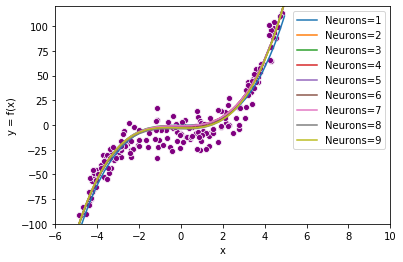

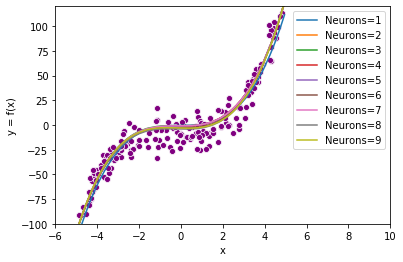

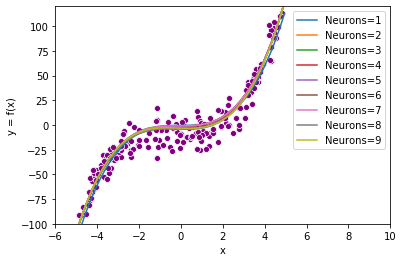

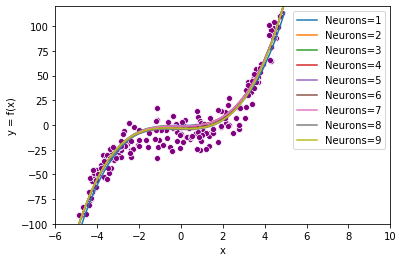

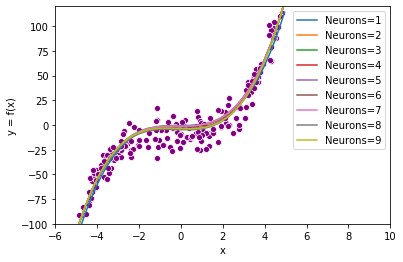

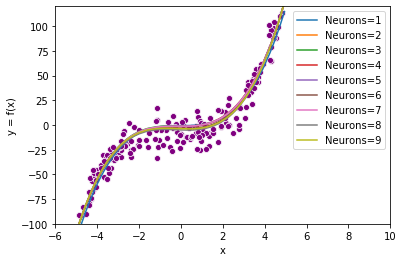

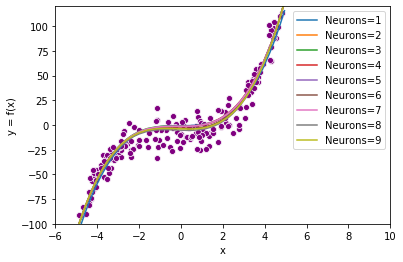

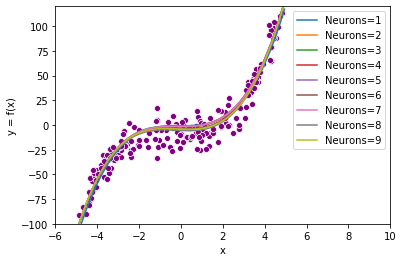

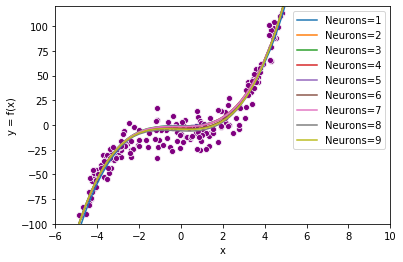

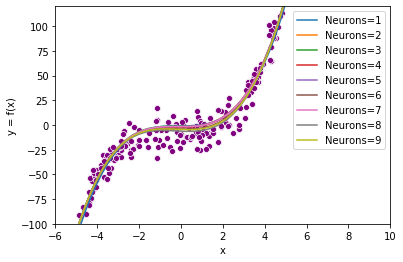

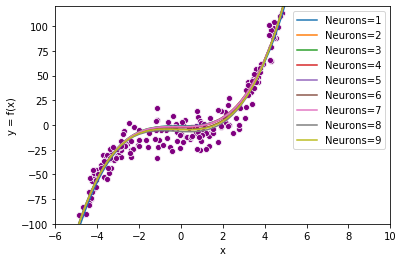

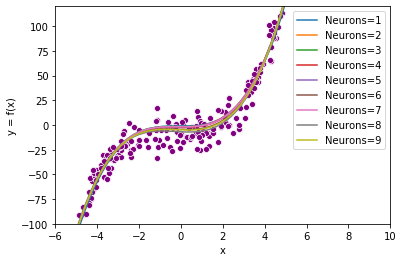

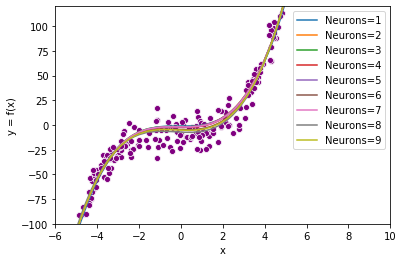

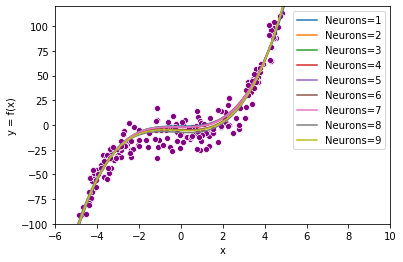

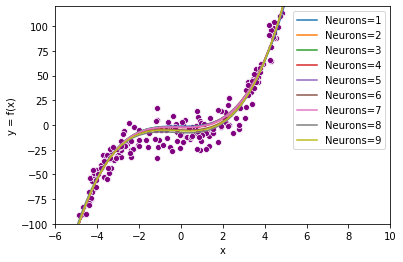

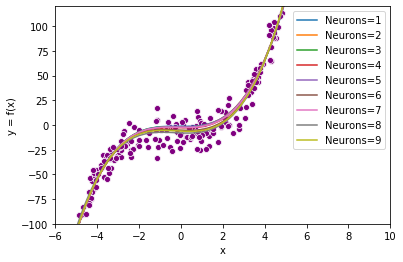

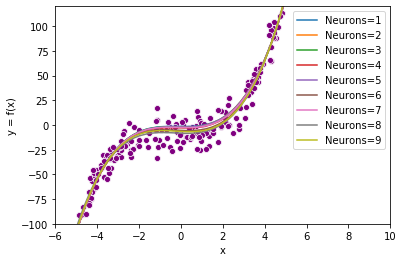

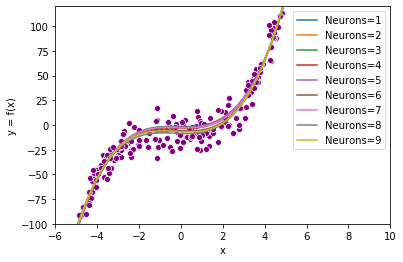

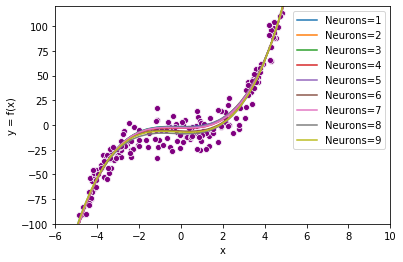

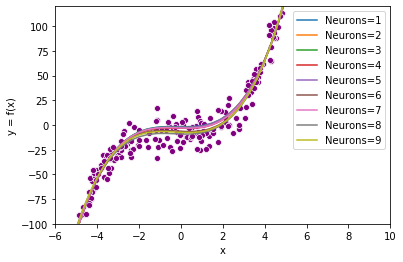

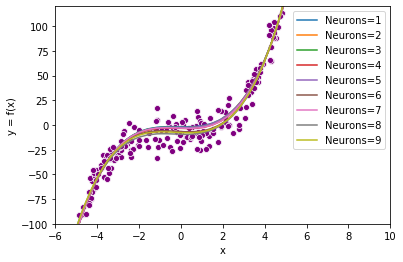

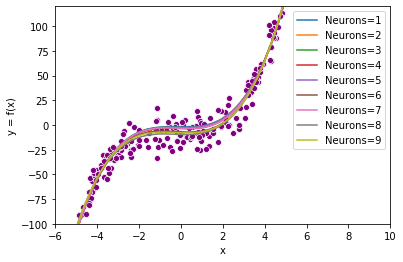

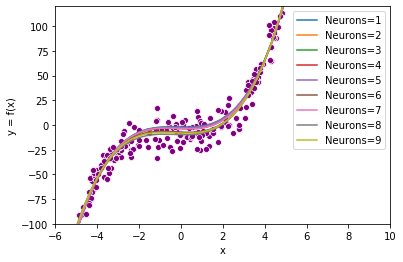

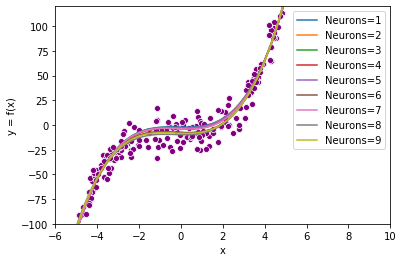

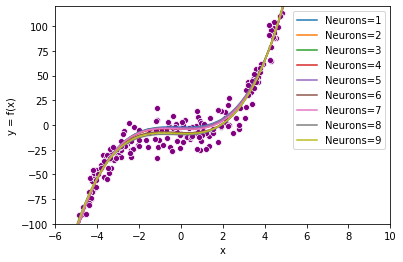

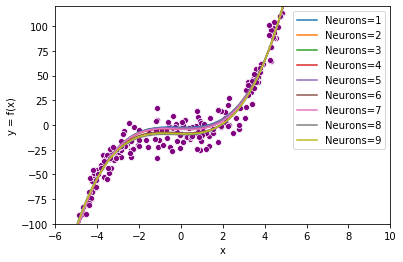

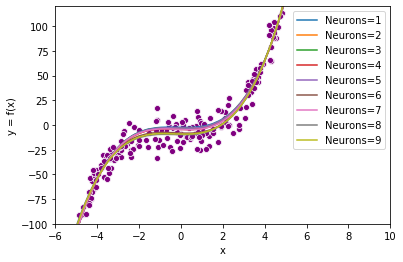

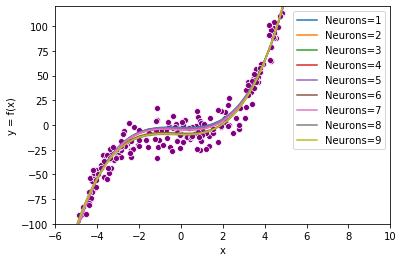

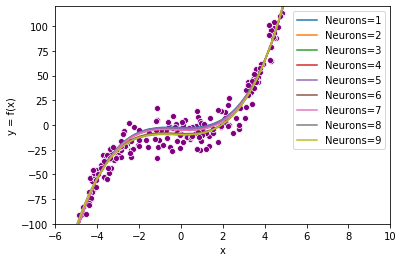

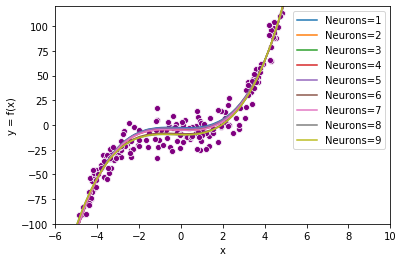

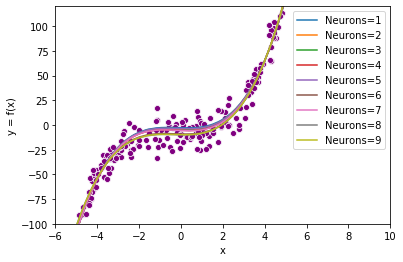

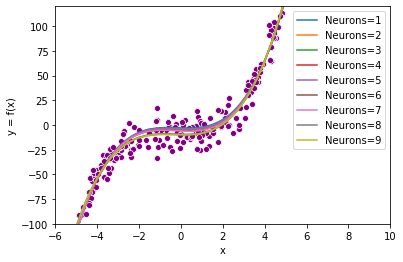

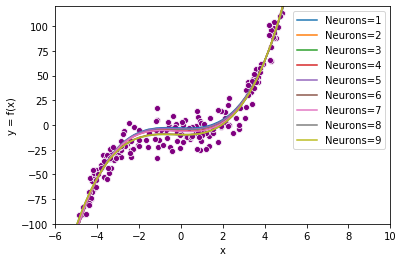

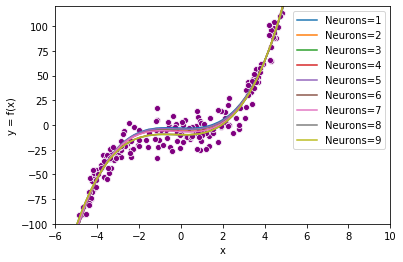

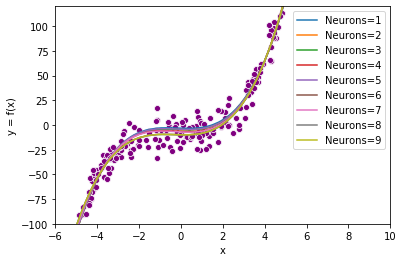

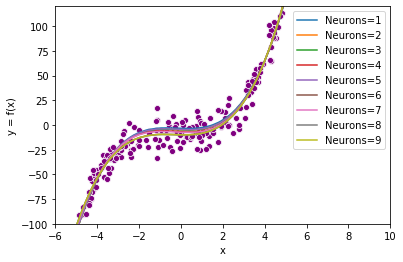

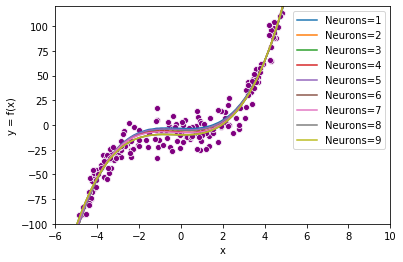

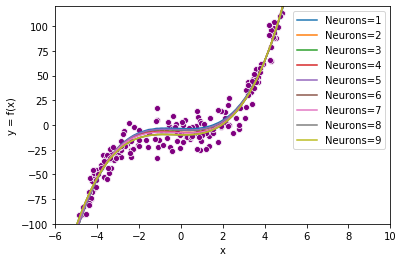

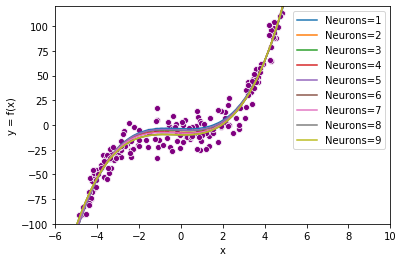

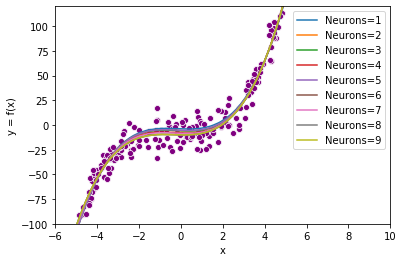

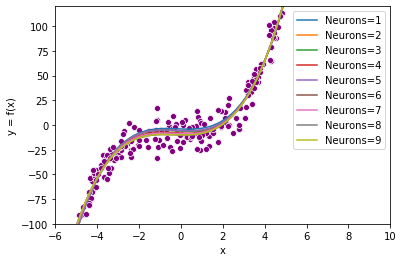

In [154]:
epochs = 100
learning_rate = 0.0001
COST = []
for epoch in range(epochs):
    trained_models = []
    validation_error = torch.zeros(len(MODELS))

    for i,model in enumerate(MODELS):
        predictions = train_model(model,learning_rate,epoch,train_loader)
        predict = predictions[0](torch.tensor(samples_train.X, dtype = torch.float32).to('cuda'))
        predict = predict.detach().to('cpu').numpy()
        sns.scatterplot(samples_train.x.flatten(),samples_train.y.flatten(), color = 'purple')
        sns.lineplot(samples_train.x.flatten(),predict.flatten(),label = 'Neurons={}'.format(len(trained_models)+1))
        plt.xlim(-6,10)
        plt.ylim(-100,120)
        plt.xlabel('x')
        plt.ylabel('y = f(x)')
        plt.legend()
        validation_error[i] = evaluate_model(predictions[0], samples_val.X, samples_val.y)
        
        trained_models.append(predictions[0])
        
        
    COST.append(validation_error)
    plt.savefig('Cubic{}.png'.format(epoch), dpi =300,  bbox_inches = 'tight')
    plt.show()

In [144]:
COST

[tensor([24.4064, 16.8689, 16.4989, 22.8466, 12.9833, 23.2162, 16.0084, 19.9223,
         17.7972]),
 tensor([24.2746, 16.6726, 16.3676, 22.6127, 12.8976, 22.8759, 15.6150, 19.4342,
         17.3111]),
 tensor([24.0142, 16.2907, 16.1081, 22.1516, 12.8878, 22.1953, 14.8300, 18.4584,
         16.3460]),
 tensor([23.6315, 15.7422, 15.7267, 21.4722, 12.8973, 21.2173, 13.7042, 16.9940,
         14.9724]),
 tensor([23.1358, 15.0268, 15.2142, 20.5660, 12.9698, 19.9240, 12.4542, 15.0403,
         13.4429]),
 tensor([22.5402, 14.3072, 14.5602, 19.4397, 13.2479, 18.3061, 11.3563, 12.8578,
         12.3542]),
 tensor([21.8596, 13.5108, 13.7700, 18.1343, 13.7276, 16.3637, 11.4743, 11.3335,
         12.3893]),
 tensor([21.1131, 12.9943, 12.9201, 16.6090, 14.4454, 14.1784, 13.3109, 12.0224,
         13.5238]),
 tensor([20.3223, 13.0221, 12.0335, 14.9457, 15.7057, 12.1889, 16.3057, 14.9186,
         16.7220]),
 tensor([19.5122, 13.3874, 11.3288, 13.4375, 18.0979, 11.4484, 20.7917, 19.3283,
         2

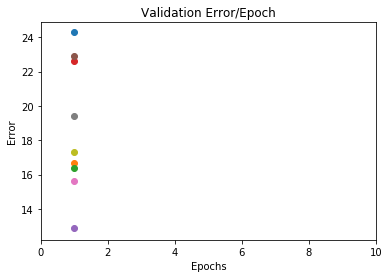

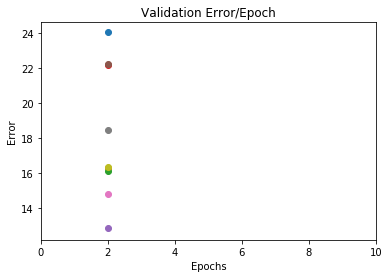

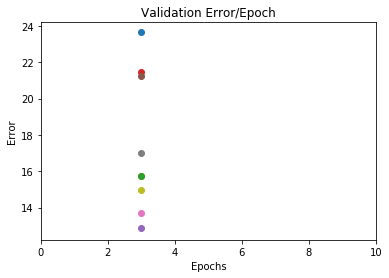

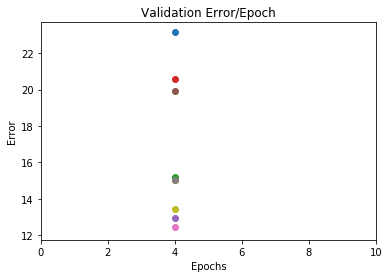

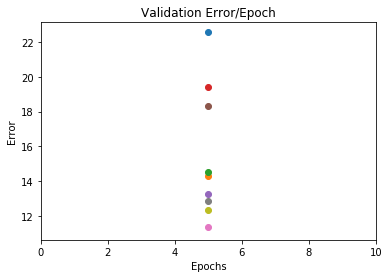

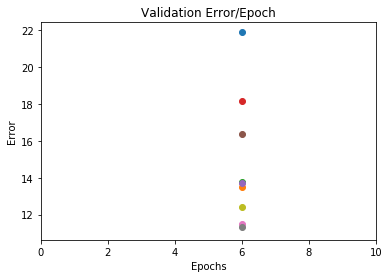

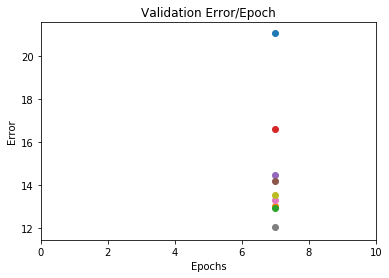

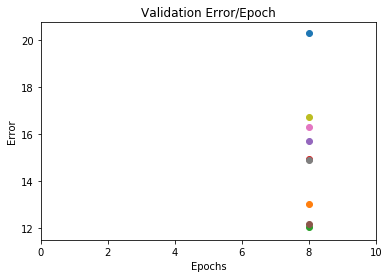

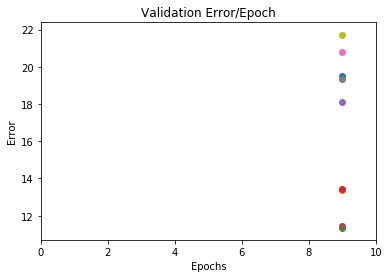

In [141]:
e = np.asarray(range(1,epochs))
for i in range(1,epochs):
    for j in range(0, len(MODELS)):
        plt.scatter(i,COST[i][j])
        plt.xlim(0,epochs)
        plt.title('Validation Error/Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        
    plt.savefig('Error_Epoch{}.png'.format(i), dpi =300,  bbox_inches = 'tight')
    plt.show()

(-6, 9)

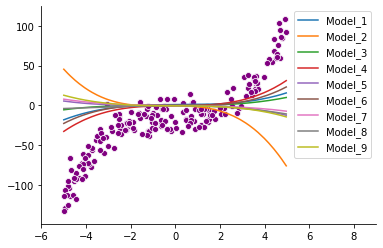

In [303]:
for i in range(len(trained_models)):
    predict = trained_models[i](torch.tensor(samples_train.X, dtype = torch.float32).to('cuda'))
    predict = predict.detach().to('cpu').numpy()
    sns.scatterplot(samples_train.x.flatten(),samples_train.y.flatten(), color = 'purple')
    sns.lineplot(samples_train.x.flatten(),predict.flatten(),label = 'Model_{}'.format(i+1))
    sns.despine()
plt.xlim(-6,9)

In [28]:
for model in trained_models:
    evaluations = model(torch.tensor(samples_val.X, dtype = torch.float32).to('cuda'))
    

[Neural(
   (linear1): Linear(in_features=3, out_features=1, bias=True)
   (linear2): Linear(in_features=1, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Linear(in_features=3, out_features=2, bias=True)
   (linear2): Linear(in_features=2, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Linear(in_features=3, out_features=3, bias=True)
   (linear2): Linear(in_features=3, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Linear(in_features=3, out_features=4, bias=True)
   (linear2): Linear(in_features=4, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Linear(in_features=3, out_features=5, bias=True)
   (linear2): Linear(in_features=5, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Linear(in_features=3, out_features=6, bias=True)
   (linear2): Linear(in_features=6, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Linear(in_features=3, out_features=7, bias=True)
   (linear2): Linear(in_features=7, out_features=1, bias=True)
 ),
 Neural(
   (linear1): Line